In [85]:
import sys
import torch
import torchvision.transforms
import datetime
import numpy as np
from scipy.stats import lognorm

In [6]:
_file_root = "/home/walsh/data/sdoml_uncorrected_degradation"
_size_pixels = 512

In [35]:
def read_npz_data(file_name):
    file_name += ".npz"
    try:
        with open(file_name, "rb") as f:
            data = torch.from_numpy(np.load(f)["x"])

        if _size_pixels != data.shape[-1]:
            data = torchvision.transforms.functional.resize(
                img=data.unsqueeze(0),
                size=(_size_pixels, _size_pixels),
                antialias=True,
            ).squeeze(0)
        return data
    except FileNotFoundError:
        # print('File not found: {}'.format(file_name))
        return None
    except KeyboardInterrupt:
        raise
    except:
        print("Unexpected error:", sys.exc_info()[0])
        return None

In [142]:
# load old SDOMLv1 data
def load_aia(date, _file_root):
    file_name_base = "{}/{}/AIA{}{:02}{:02}_{:02}{:02}".format(
        _file_root,
        date.year,
        # date.month,
        # date.day,
        date.year,
        date.month,
        date.day,
        date.hour,
        date.minute,
    )
    print(file_name_base)
    file_name_0094 = file_name_base + "_0094"
    file_name_0131 = file_name_base + "_0131"
    file_name_0171 = file_name_base + "_0171"
    file_name_0193 = file_name_base + "_0193"
    file_name_0211 = file_name_base + "_0211"
    file_name_0304 = file_name_base + "_0304"
    file_name_0335 = file_name_base + "_0335"
    file_name_1600 = file_name_base + "_1600"
    file_name_1700 = file_name_base + "_1700"
    available_mask = torch.ones(9)
    c0094 = read_npz_data(file_name_0094)
    if c0094 is None:
        c0094 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[0] = 0
    c0131 = read_npz_data(file_name_0131)
    if c0131 is None:
        c0131 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[1] = 0
    c0171 = read_npz_data(file_name_0171)
    if c0171 is None:
        c0171 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[2] = 0
    c0193 = read_npz_data(file_name_0193)
    if c0193 is None:
        c0193 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[3] = 0
    c0211 = read_npz_data(file_name_0211)
    if c0211 is None:
        c0211 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[4] = 0
    c0304 = read_npz_data(file_name_0304)
    if c0304 is None:
        c0304 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[5] = 0
    c0335 = read_npz_data(file_name_0335)
    if c0335 is None:
        c0335 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[6] = 0
    c1600 = read_npz_data(file_name_1600)
    if c1600 is None:
        c1600 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[7] = 0
    c1700 = read_npz_data(file_name_1700)
    if c1700 is None:
        c1700 = torch.zeros(_size_pixels, _size_pixels)
        available_mask[8] = 0
    # print('end aia')
    all_available = bool(available_mask.prod())
    # return (
    #     torch.stack(
    #         [c0094, c0131, c0171, c0193, c0211, c0304, c0335, c1600, c1700]
    #     ),
    #     available_mask,
    #     all_available,
    # )
    # if available_mask[0] != 0:
    #     return c0094
    # else:
    #     return None
    if available_mask[5] != 0:
        return c0304
    else:
        return None

/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200123_0006


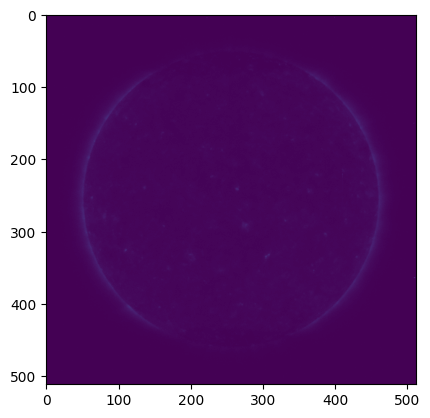

In [113]:
date = datetime.datetime.strptime("2020-01-23T00:06:00", "%Y-%m-%dT%H:%M:%S")
t = load_aia(date, _file_root=_file_root)
# t[0][0]
from matplotlib import pyplot as plt

plt.imshow(t[0][0].numpy(), vmax=126.47331)

In [107]:
t[0][0].numpy().max()

0.0

In [108]:
date = datetime.strptime("2010-05-23T00:06:00", "%Y-%m-%dT%H:%M:%S")
t = load_aia(date, _file_root=_file_root)

AttributeError: module 'datetime' has no attribute 'strptime'

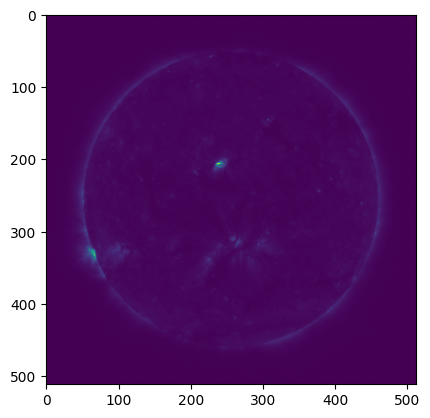

In [37]:
plt.imshow(t[0][0].numpy())

In [143]:
input_data = []
date2020 = datetime.datetime.strptime("2020-01-01T00:06:00", "%Y-%m-%dT%H:%M:%S")
for i in range(364):
    date = end_date = date2020 + datetime.timedelta(days=i)
    print(date)
    t = load_aia(date, _file_root=_file_root)
    if t is not None:
        input_data.append(t.numpy())

2020-01-01 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200101_0006
2020-01-02 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200102_0006
2020-01-03 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200103_0006
2020-01-04 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200104_0006
2020-01-05 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200105_0006
2020-01-06 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200106_0006
2020-01-07 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200107_0006
2020-01-08 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200108_0006
2020-01-09 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200109_0006
2020-01-10 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200110_0006
2020-01-11 00:06:00
/home/walsh/data/sdoml_uncorrected_degradation/2020/AIA20200111_0006
2020-01-12 00:06:00
/

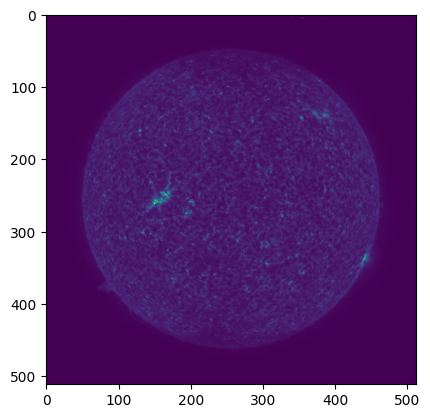

In [144]:
plt.imshow(input_data[10])

In [130]:
np.stack(input_data).shape

(191, 512, 512)

In [145]:
subsample = 2
original_ratio = 512

input_data = np.stack(input_data)
dimension_input_data = input_data.shape
xposmin = int(original_ratio / (4 * subsample))
xposmax = int(original_ratio / (4 * subsample)) + int(
    original_ratio / (2.0 * subsample)
)
yposmin = int(original_ratio / (4 * subsample))
yposmax = int(original_ratio / (4 * subsample)) + int(
    original_ratio / (2.0 * subsample)
)
roi_cut_out = [xposmin, xposmax, yposmin, yposmax]  # Avoiding the limb of the Sun.

mag_threshold = 5.0  # This is the magnetic field strength in Gauss, above which we mask all the pixels with 0 value, rest are 1.

# compute the most probable value for the first image (ground truth) once and iterate over the dimmed.
mask_qs_reference = np.zeros(
    (int(original_ratio / (2.0 * subsample)), int(original_ratio / (2.0 * subsample))),
    dtype=float,
)
input_cut_out_reference = input_data[
    0, roi_cut_out[0] : roi_cut_out[1], roi_cut_out[2] : roi_cut_out[3]
]  # Index =0 i.e. time=0
indices_threshold_reference = np.where(
    np.abs(input_cut_out_reference[:, :]) <= mag_threshold
)
mask_qs_reference[indices_threshold_reference[0], indices_threshold_reference[1]] = (
    1  # Setting the pixels for the QS to 1
)

mode_ref = np.zeros([7])
peak_ref = np.zeros([7])

# for ch in range(len(channels)-1): #For each time, iterate over the AIA channels. The last channel is HMI so len(channels)-1.
#     quiet_sun_AIA_reference = mask_qs_reference*input_cut_out_reference[ch,:,:]#.copy #MJ
#     indices_no_zero = np.where(quiet_sun_AIA_reference>=0.1) #Considering the pixels without the zeros.
#     shape_ref,loc_ref,scale_ref = lognorm.fit(quiet_sun_AIA_reference[indices_no_zero[0],indices_no_zero[1]],floc=0)# Fitting a log normal distribution
#     mode_ref[ch] = np.exp(np.log(scale_ref)-shape_ref**2)+loc_ref

#     test_histo=np.histogram(quiet_sun_AIA_reference[indices_no_zero[0],indices_no_zero[1]], bins=3000)
#     peak_ref[ch]=test_histo[1][np.argmax(test_histo[0])]

quiet_sun_AIA_reference = mask_qs_reference * input_cut_out_reference[:, :]  # .copy #MJ
indices_no_zero = np.where(
    quiet_sun_AIA_reference >= 0.1
)  # Considering the pixels without the zeros.
shape_ref, loc_ref, scale_ref = lognorm.fit(
    quiet_sun_AIA_reference[indices_no_zero[0], indices_no_zero[1]], floc=0
)  # Fitting a log normal distribution
mode_ref = np.exp(np.log(scale_ref) - shape_ref**2) + loc_ref

test_histo = np.histogram(
    quiet_sun_AIA_reference[indices_no_zero[0], indices_no_zero[1]], bins=3000
)
peak_ref = test_histo[1][np.argmax(test_histo[0])]


print("Mode of the fit", mode_ref)
print("Peak of the fit", peak_ref)

Mode of the fit 0.32826520886874977
Peak of the fit 0.17192769944667816


5


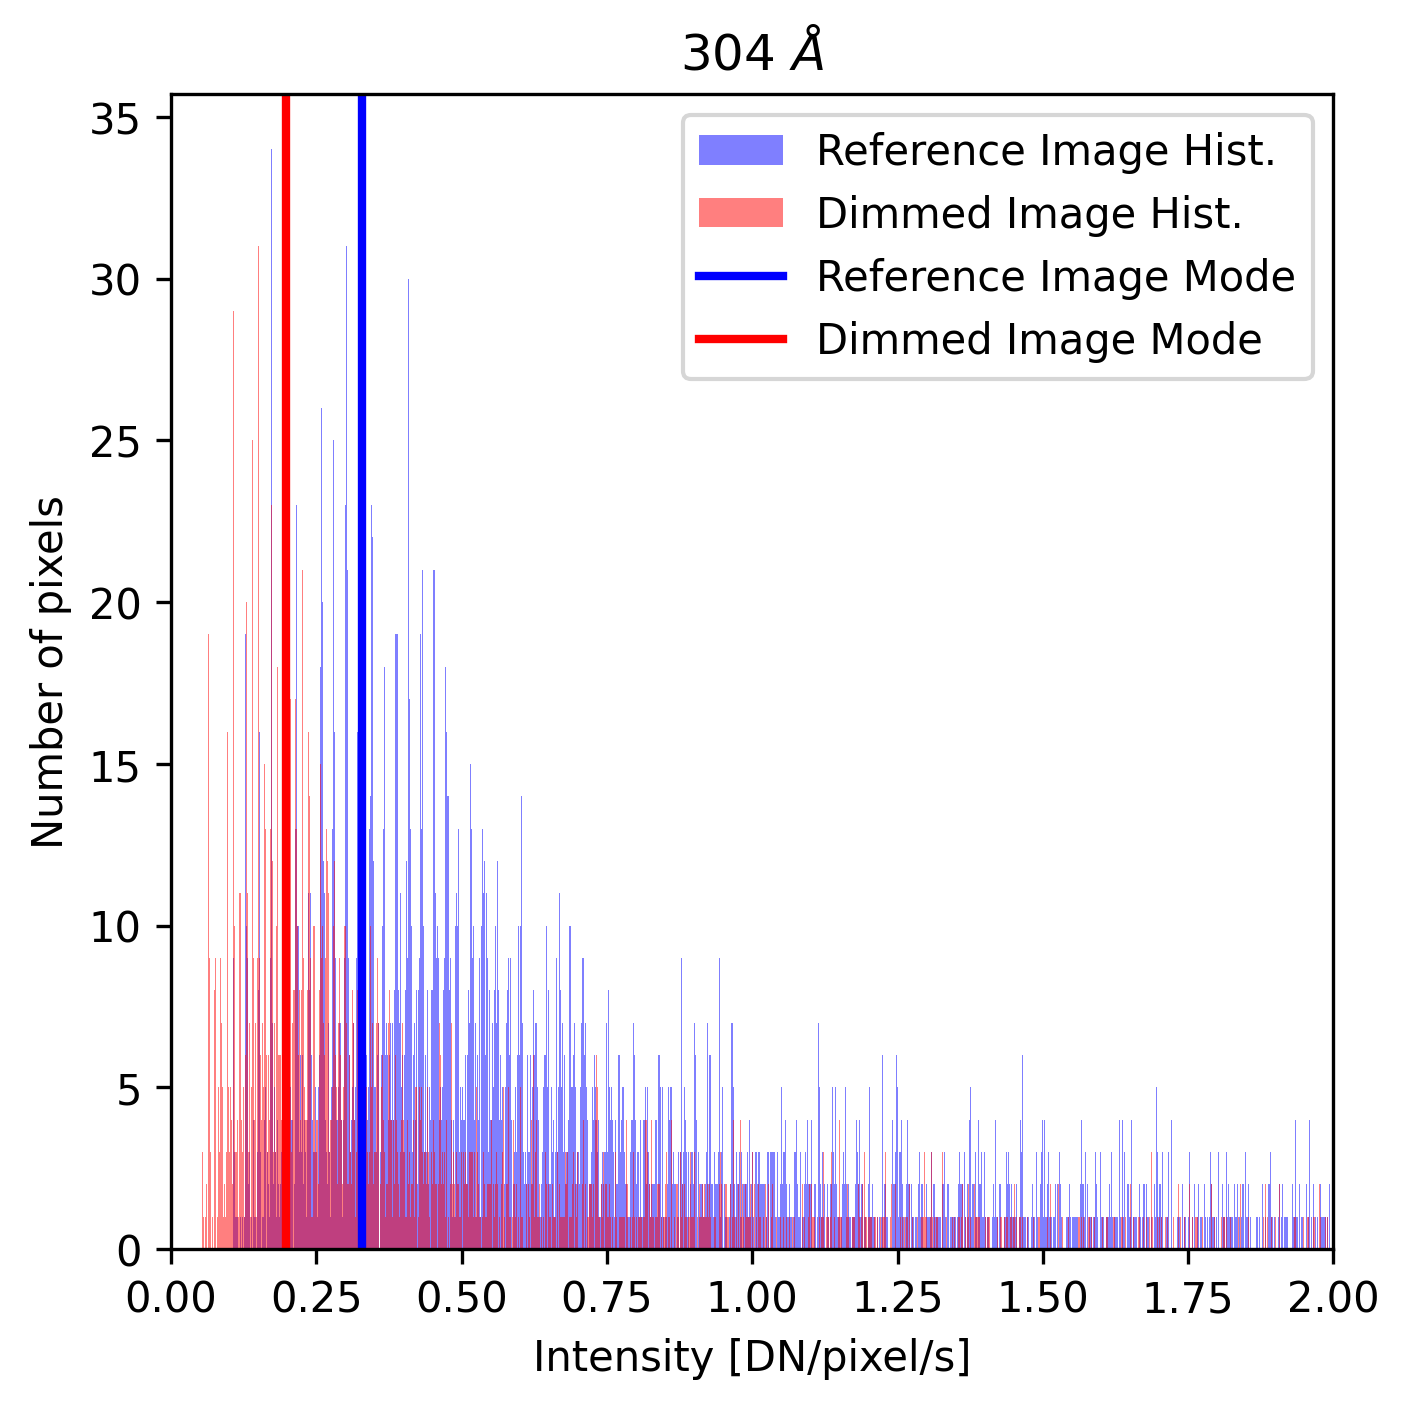

In [149]:
# quiet_sun_AIA_reference = t[0][0].numpy()
dimmed_sun = quiet_sun_AIA_reference * 0.5
ch = 5
indices_no_zero = np.where(
    dimmed_sun >= 0.1
)  # Considering the pixels without the zeros.
shape_ref, loc_ref, scale_ref = lognorm.fit(
    dimmed_sun[indices_no_zero[0], indices_no_zero[1]], floc=0
)  # Fitting a log normal distribution
dimmed_ref = np.exp(np.log(scale_ref) - shape_ref**2) + loc_ref

test_histo = np.histogram(
    quiet_sun_AIA_reference[indices_no_zero[0], indices_no_zero[1]], bins=3000
)
############ peak_ref[ch]=test_histo[1][np.argmax(test_histo[0])]

xlimit_plot = [
    20,
    50,
    900,
    900,
    500,
    2,
    80,
]  # this can be changed for the visualization
# xlimit_plot = [60,700] #this can be changed for the visualization


fig, ax = plt.subplots(figsize=(5, 5), sharey=False, dpi=300)

print(ch)
quiet_sun_AIA_reference = mask_qs_reference * input_cut_out_reference[:, :]  # .copy #MJ
indices_no_zero = np.where(
    quiet_sun_AIA_reference >= 0.1
)  # Considering the pixels without the zeros.
ax.set_ylabel("Number of pixels")
ax.set_title("$304~\AA$")
ax.set_xlabel("Intensity [DN/pixel/s]")
ax.set_xlim([0, xlimit_plot[ch]])
ax.hist(
    x=pd.Series(
        np.ravel(quiet_sun_AIA_reference[indices_no_zero[0], indices_no_zero[1]])
    ),
    bins=3000,
    color="blue",
    alpha=0.5,
    label="Reference Image Hist.",
)
ax.hist(
    x=pd.Series(np.ravel(dimmed_sun[indices_no_zero[0], indices_no_zero[1]])),
    bins=3000,
    color="red",
    alpha=0.5,
    label="Dimmed Image Hist.",
)
ax.axvline(x=mode_ref, color="blue", label="Reference Image Mode", linewidth=2)
ax.axvline(x=dimmed_ref, color="red", label="Dimmed Image Mode", linewidth=2)

# ax.axvline(x=peak_ref, color='red',label='Peak')
ax.legend()
# fig.savefig('/home/lguedesd/hist_demo.pdf',dpi=1000,bbox_inches='tight')
fig.show()

In [152]:
import zarr

aia_data = zarr.group(zarr.DirectoryStore("/mnt/sdoml/AIA.zarr/"))

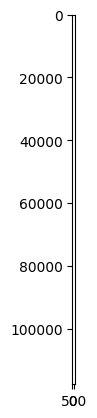

In [170]:
im = aia_data[2020]["304A"][0]
input_cut_out_reference = im[
    roi_cut_out[0] : roi_cut_out[1], roi_cut_out[2] : roi_cut_out[3]
]  # Index =0 i.e. time=0
indices_threshold_reference = np.where(
    np.abs(input_cut_out_reference[:, :]) <= mag_threshold
)
mask_qs_reference[indices_threshold_reference[0], indices_threshold_reference[1]] = (
    1  # Setting the pixels for the QS to 1
)
plt.imshow(mask_qs_reference * input_cut_out_reference[:, :])
plt.hist(im[im > 0.1], bins=100)
plt.show()

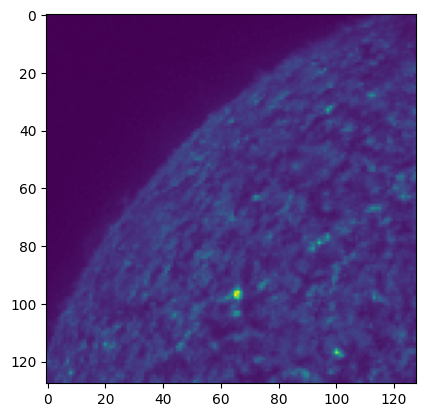

In [172]:
plt.imshow(im[roi_cut_out[0] : roi_cut_out[1], roi_cut_out[2] : roi_cut_out[3]])

In [75]:
"""
In this module we define a pytorch SDO dataset
"""

import logging
from os import path
import random
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
from numpy import zeros, load

_logger = logging.getLogger(__name__)
B_CHANNELS = ["bx", "by", "bz"]
UV_CHANNELS = ["1600", "1700", "0094", "0131", "0171", "0193", "0211", "0304", "0335"]
DATA_FILENAME_TEMPLATE = (
    "{0:s}/{1:04d}/{2:s}{3:04d}{4:02d}{5:02d}_{6:02d}{7:02d}_{8:s}.npz"
)
BUNIT = 2000.0  # units of 2 kGauss
AUNIT = 100.0  # units of 100 DN/s/pixel
AUNIT_BYCH = {
    "1600": 500.0,
    "1700": 7000.0,
    "0094": 10.0,
    "0131": 80.0,
    "0171": 2000.0,
    "0193": 3000.0,
    "0211": 1000.0,
    "0304": 500.0,
    "0335": 80.0,
}


def sdo_scale(img, ch, aunit_dict=AUNIT_BYCH, bunit=BUNIT):
    """
    Purpose: Given an SDO image of a given channel, returned scaled image.
    Scaling values are supposed to be the mean of the channel across
    the full time period.

    Params:
    img (np.array): image to be rescaled
    ch (str): string describing the channel img belongs to
    aunit_dict (dict int): units UV channels
    bunit (int): units magnetogram

    Returns np.array of the same size of img
    """
    if ch in B_CHANNELS:
        return img / bunit
    elif ch in UV_CHANNELS:
        return img / aunit_dict[ch]
    else:
        _logger.error("Channel not found, input image is returned")
        return img


def sdo_find(
    year,
    month,
    day,
    hour,
    minu,
    initial_size,
    basedir,
    instrs=["AIA", "AIA", "HMI"],
    channels=["0171", "0193", "bx"],
    subsample=1,
    return_images=False,
):
    """
    Purpose: Find filenames of multiple channels of the SDOML dataset with the same
    timestamp.

    Parameters:
    year / month / day - a date between May 17 2010 to 12/31/2018
    hour - between 0 and 23
    minu - between 0 and 59 (note AIA data is at 6 min cadence, HMI at 12 min cadence)
    basedir - directory where the SDO data set is stored.
    initial_size - Unscaled resolution of images.
    instr - 'AIA' or 'HMI'
    channel -
       if instr=='AIA', channel should be one of '0094', '0131', '0171', '0193', '0211',
           '0304', '0335', '1600', '1700'
       if instr=='HMI', channel should be one of 'bx', 'by', 'bz'
           (last is the line-of-sight component of the magnetic field)
    subsample - return image with every subsample-th pixel in both dimensions
    return_images (bool). If False it returns the list of files. If True
         images are returned.

    Returns: list of files if return_images False (default).
            np.array of shape (n, n, number of channels).
            Returns -1 if not all channels are found.
    """
    files_exist = True
    files = []
    for ind, ch in enumerate(channels):
        minu = 6
        files.append(
            DATA_FILENAME_TEMPLATE.format(
                basedir, year, instrs[ind], year, month, day, hour, minu, ch
            )
        )
        print(
            DATA_FILENAME_TEMPLATE.format(
                basedir, year, instrs[ind], year, month, day, hour, minu, ch
            )
        )
        # print(files)
        # files_exist = path.isfile(files[-1])
        # print(files_exist)

    if files_exist:
        if not return_images:
            return files
        else:
            img = zeros(
                shape=(
                    int(initial_size / subsample),
                    int(initial_size / subsample),
                    len(channels),
                ),
                dtype="float32",
            )
            for c in range(len(channels)):
                img[:, :, c] = sdo_scale(
                    ((load(files[c]))["x"])[::subsample, ::subsample], channels[c]
                )
            return img
    else:
        return -1


class SDO_Dataset(Dataset):
    """Custom Dataset class compatible with torch.utils.data.DataLoader.
    It can be used to flexibly load a train or test dataset from the SDO local folder,
    asking for a specific range of years and a specific frequency in months, days, hours,
    minutes. Scaling is applied by default, normalization can be optionally applied."""

    def __init__(
        self,
        data_basedir,
        data_inventory,
        instr=["AIA", "AIA", "HMI"],
        channels=["0171", "0193", "bz"],
        yr_range=[2010, 2018],
        mnt_step=1,
        day_step=1,
        h_step=6,
        min_step=60,
        resolution=512,
        subsample=1,
        test=False,
        test_ratio=0.3,
        shuffle=False,
        normalization=0,
        scaling=True,
        apodize=False,
        holdout=False,
        mm_files=True,
    ):
        """
        Args:
            data_basedir (str): path to locate training/testing data.
            data_inventory (str): path to a pre-computed inventory file that contains
                a dataframe of existing files. If False(or not valid) the file search is done
                by folder and it is much slower.
            channels (list string): channels to be selected
            instr (list string): instrument to which each channel corresponds to.
                                 It has to be of the same size of channels.
            yr_range (list int): range of years to be selected
            mnt_step (int): month frequency
            day_step (int): day frequency
            h_step (int): hour frequency
            min_step (int): minute frequency
            resolution (int): original resolution
            base_dir (str): path to the main dataset folder
            test (bool): if True, a test dataset is returned. By default the training dataset is returned.
            test_ratio (float): percentage of data to be used for testing. Training ratio is 1-test_ratio.
            shuffle (bool): if True, the dataset will be shuffled. Keep it False if you want to return
                            a time-ordered dataset.
            subsample (int): if 1 resolution of the final images will be as the original.
                             If > 1 the image is downsampled. i.e. if resolution=512 and
                             subsample=4, the images will be 128*128
            normalization (int): if 0 normalization is not applied, if > 0 a normalization
                                 by image is applied (only one type of normalization implemented
                                 for now)
            scaling (bool): if True pixel values are scaled by the expected max value in active regions
                            (see sdo.io.sdo_scale)
            holdout (bool): if True use the holdout as test set. test_ratio is ignored in this case.
            apodize (bool): if True it masks the Sun’s limb. Remove anything farther than 1 solar radii from the center.
            mm_files (bool): if True it loads memory maps format data. If False it loads npz format data. SDOML available
            online is usually in npz format.
        """
        assert day_step > 0 and h_step > 0 and min_step > 0

        self.data_basedir = data_basedir
        self.instr = instr
        self.channels = channels
        self.resolution = resolution
        self.subsample = subsample
        self.shuffle = shuffle
        self.yr_range = yr_range
        self.mnt_step = mnt_step
        self.day_step = day_step
        self.h_step = h_step
        self.min_step = min_step
        self.test = test
        self.test_ratio = test_ratio
        self.normalization = normalization
        self.scaling = scaling
        self.apodize = apodize
        self.holdout = holdout
        self.mm_files = mm_files

        _logger.info("apodize={}".format(self.apodize))

        if path.isfile(data_inventory):
            self.data_inventory = data_inventory
        else:
            _logger.warning(
                "A valid inventory file has NOT be passed"
                "If this is not expected check the path."
            )
            self.data_inventory = False
        self.files, self.timestamps = self.create_list_files()

    def find_months(self):
        "select months for training and test based on test ratio"
        # November and December are kept as holdout
        if not self.holdout:
            months = np.arange(1, 11, self.mnt_step)
            if self.test:
                n_months = int(len(months) * self.test_ratio)
                months = months[-n_months:]
                _logger.info('Testing on months "%s"' % months)
            else:
                n_months = int(len(months) * (1 - self.test_ratio))
                months = months[:n_months]
                _logger.info('Training on months "%s"' % months)
        else:
            months = [11, 12]
        return months

    def create_list_files(self):
        """
        Find path to files that correspond to the requested timestamps. A timestamp
        is returned only if the files from ALL the requested channels are found.

        Returns: list of lists of strings, list of tuples. The first argument are the
             path to the files, each row is a timestamp. The second argument are the
             correspondant timestamps.

        """
        print('Loading SDOML from "%s"' % self.data_basedir)
        print('Loading SDOML inventory file from "%s"' % self.data_inventory)
        indexes = ["year", "month", "day", "hour", "min"]
        yrs = np.arange(self.yr_range[0], self.yr_range[1] + 1)
        months = self.find_months()
        days = np.arange(1, 32, self.day_step)
        hours = np.arange(0, 24, self.h_step)
        minus = np.arange(0, 60, self.min_step)
        tot_timestamps = np.prod([len(x) for x in [yrs, months, days, hours, minus]])
        _logger.debug("Timestamps requested values: ")
        _logger.debug("Years: %s" % ",".join("{}".format(i) for i in (yrs)))
        _logger.debug("Months: %s" % ",".join("{}".format(i) for i in (months)))
        _logger.debug("Days: %s" % ",".join("{}".format(i) for i in (days)))
        _logger.debug("Hours: %s" % ",".join("{}".format(i) for i in (hours)))
        _logger.debug("Minutes: %s" % ",".join("{}".format(i) for i in (minus)))
        _logger.info("Max number of timestamps: %d" % tot_timestamps)

        if self.data_inventory:
            df = pd.read_pickle(self.data_inventory)
            cond0 = df["channel"].isin(self.channels)
            cond1 = df["year"].isin(yrs)
            cond2 = df["month"].isin(months)
            cond3 = df["day"].isin(days)
            cond4 = df["hour"].isin(hours)
            cond5 = df["min"].isin(minus)

            sel_df = df[cond0 & cond1 & cond2 & cond3 & cond4 & cond5]
            n_sel_timestamps = sel_df.groupby(indexes).head(1).shape[0]
            _logger.info(
                "Timestamps found in the inventory: %d (%.2f)"
                % (n_sel_timestamps, float(n_sel_timestamps) / tot_timestamps)
            )
            grouped_df = sel_df.groupby(indexes).size()
            # we select only timestamp that have files for all the channels
            grouped_df = grouped_df[grouped_df == len(self.channels)].to_frame()
            sel_df = sel_df.reset_index().drop("index", axis=1)
            sel_df = pd.merge(
                grouped_df, sel_df, how="inner", left_on=indexes, right_on=indexes
            )
            # sorting is essential, the order of the channels must be consistent
            s_files = sel_df.sort_values("channel").groupby(indexes)["file"].apply(list)
            files = s_files.values.tolist()
            timestamps = s_files.index.tolist()
            discarded_tm = n_sel_timestamps - len(timestamps)
        else:
            _logger.warning(
                "A valid inventory file has not been passed in, be prepared to wait."
            )
            files = []
            timestamps = []
            n_sel_timestamps = 0
            discarded_tm = 0
            for y in yrs:
                for month in months:
                    for d in days:
                        for h in hours:
                            for minu in minus:
                                # if a single channel is missing for the combination
                                # of parameters result is -1
                                result = sdo_find(
                                    y,
                                    month,
                                    d,
                                    h,
                                    minu,
                                    initial_size=self.resolution,
                                    basedir=self.data_basedir,
                                    instrs=self.instr,
                                    channels=self.channels,
                                )
                                n_sel_timestamps += n_sel_timestamps
                            if result != -1:
                                files.append(result)
                                timestamp = (y, month, d, h, minu)
                                timestamps.append(timestamp)
                            else:
                                discarded_tm += 1
        if len(files) == 0:
            print("No input images found")
        else:
            print(
                "N timestamps discarded because channel is missing = %d (%.5f)"
                % (discarded_tm, float(discarded_tm) / n_sel_timestamps)
            )
            print("Selected timestamps = %d" % len(files))
            print("N images = %d" % (len(files) * len(self.channels)))
            if self.shuffle:
                _logger.warning(
                    "Shuffling is being applied, this will alter the time sequence."
                )
                indices = np.arange(len(files))
                random.shuffle(indices)
                tmp_files = []
                tmp_timestamps = []
                for i in indices:
                    tmp_files.append(files[i])
                    tmp_timestamps.append(timestamps[i])
                files = tmp_files
                timestamps = tmp_timestamps
        return files, timestamps

    def normalize_by_img(self, img, norm_type):
        if norm_type == 1:
            # return minmax_normalization(img)
            pass
        else:
            _logger.error(
                "This type of normalization is not implemented."
                "Original image is returned"
            )
            return img

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):
        """
        This function will return a single row of the dataset, where each image has
        been scaled and normalized if requested in the class initialization.
        Args:
            index (int): dataset row index

        Returns: pytorch tensor

        """
        size = int(self.resolution / self.subsample)
        n_channels = len(self.channels)
        # the original images are NOT bytescaled
        # we directly convert to 32 because the pytorch tensor will need to be 32
        item = np.zeros(shape=(n_channels, size, size), dtype=np.float32)

        img = np.zeros(shape=(size, size), dtype=np.float32)
        for c in range(n_channels):
            if (
                self.mm_files
            ):  # Load the SDOML files depending on which extension used. mm_file = true will load memory maps.
                temp = np.memmap(
                    self.files[index][c],
                    shape=(self.resolution, self.resolution),
                    mode="r",
                    dtype=np.float32,
                )
            else:
                temp = np.load(self.files[index][c], allow_pickle=True)["x"]
            img[:, :] = temp[:: self.subsample, :: self.subsample]
            # if self.scaling:
            #     # divide by roughly the mean of the channel
            #     img = sdo_scale(img, self.channels[c])
            if self.normalization > 0:
                img = self.normalize_by_img(img, self.normalization)
            item[c, :, :] = img

        if self.apodize:
            # Set off limb pixel values to zero
            x = np.arange((img.shape[0]), dtype=np.float) - img.shape[0] / 2 + 0.5
            y = np.arange((img.shape[1]), dtype=np.float) - img.shape[1] / 2 + 0.5
            xgrid = np.ones(shape=(img.shape[1], 1)) @ x.reshape((1, x.shape[0]))
            ygrid = y.reshape((y.shape[0], 1)) @ np.ones(shape=(1, img.shape[0]))
            dist = np.sqrt(xgrid * xgrid + ygrid * ygrid)
            mask = np.ones(shape=dist.shape, dtype=np.float)
            mask = np.where(
                dist < 200.0 / self.subsample, mask, 0.0
            )  # Radius of sun at 1 AU is 200*4.8 arcsec
            for c in range(len(self.channels)):
                item[c, :, :] = item[c, :, :] * mask

        timestamps = self.timestamps[index]
        output = [to_tensor(item), to_tensor(timestamps)]

        # Note: For efficiency reasons, don't send each item to the GPU;
        # rather, later, send the entire batch to the GPU.
        return output

In [79]:
from torch.utils.data import DataLoader

channels = ["0304"]
instr = ["AIA"]
subsample = 2
data = SDO_Dataset(
    data_basedir=_file_root,
    data_inventory=False,
    instr=instr,
    channels=channels,
    yr_range=[2011, 2013],  # experiment 2
    mnt_step=6,
    day_step=1,
    h_step=24,
    min_step=1,
    subsample=subsample,
    normalization=0,
    scaling=False,
    test=True,
)
batch_size = data.__len__() * len(
    channels
)  # Loading the number of images = files*channels
loader = DataLoader(data, batch_size=batch_size, shuffle=False)

A valid inventory file has NOT be passedIf this is not expected check the path.
A valid inventory file has not been passed in, be prepared to wait.


Loading SDOML from "/home/walsh/data/sdoml_uncorrected_degradation"
Loading SDOML inventory file from "False"
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrected_degradation/2011/AIA20110101_0006_0304.npz
/home/walsh/data/sdoml_uncorrect

ZeroDivisionError: float division by zero

In [17]:
data.__len__()

0